## Capstone Project Submission

* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **11/25/19 at 5:00 pm ET**
* Instructor name: **Eli Thomas**
* Blog post URL: https://chelseapower.github.io/recommendations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/axs.csv


In [2]:
# Set your project id here
PROJECT_ID = 'module4-Project'

from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID, location="US")

Please ensure you have selected a BigQuery account in the Kernels Settings sidebar.


In [3]:
#import warnings filter
import warnings

# ignore all future warnings
warnings.filterwarnings('ignore')

# Purpose
For this project, I will be using customer transactional and demographic data to identify affinities of genres/artists (customer segmentation) and provide recommendations to new events/artists based on their interests. 

Classification-based collaborative filtering > Logestic Regression
Model based
Content based

# OBTAIN & SCRUB: Prepare the Datasets
Load datasets: axs.csv
Data type conversions (e.g. numeric data mistakenly encoded as objects)
Detect and deal with missing values
Remove unnecessary columns

In [4]:
import pandas as pd
axs = pd.read_csv("../input/axs.csv")

axs.shape

(1000000, 15)

In [5]:
#Look at the columns and initial rows of the dataset
axs.head()

,Events - Portal Minor Category Name,Transactions Demo Cbsa Name,Demographics All Age Bucket,Demographics All Gender,Events - Portal Event Datetime Date,Events - Portal Headline,Demographics All Marital Status,Demographics All Aggregated Household Income,Demographics All State,Demographics All Education Level,Demographics All Mosaic,Events - Portal Venue Name,Transactions Demo Ticket Qty,Transactions Demo Revenue Past Year,Customer ID
0,Indie / Emo,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Tedeschi Trucks Band,Extremely Likely Married,$100-149K,UT,Some College,Suburban Style,Red Rocks Amphitheatre,2,190,1656.0
1,Pop,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Travis Scott - Astroworld: Wish You Were Here...,Likely Married,$1-49K,MN,High School Diploma,Autumn Years,Target Center,2,140,251566.0
2,Rock,Denver-Aurora-Lakewood CO,65 or Above,F,6/20/19,Explosions in the Sky,Unknown,$50-99K,CO,High School Diploma,Middle-class Melting Pot,Ogden Theatre,2,72,265262.0
3,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/22/19,Billie Eilish,Likely Single,$1-49K,CO,Some College,Promising Families,Red Rocks Amphitheatre,2,465,265658.0
4,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/16/19,An Evening with Fleetwood Mac,Extremely Likely Married,$150-250K,MO,Graduate Degree,Power Elite,T-Mobile Arena,2,220,397461.0


In [6]:
#Set columns
axs.columns=['genre','location','age','gender','datetime','headline','marital','household_income','state','education',
            'mosaic','venue_name','ticket_qty','revenue_2018','ID']

axs.head()

,genre,location,age,gender,datetime,headline,marital,household_income,state,education,mosaic,venue_name,ticket_qty,revenue_2018,ID
0,Indie / Emo,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Tedeschi Trucks Band,Extremely Likely Married,$100-149K,UT,Some College,Suburban Style,Red Rocks Amphitheatre,2,190,1656.0
1,Pop,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Travis Scott - Astroworld: Wish You Were Here...,Likely Married,$1-49K,MN,High School Diploma,Autumn Years,Target Center,2,140,251566.0
2,Rock,Denver-Aurora-Lakewood CO,65 or Above,F,6/20/19,Explosions in the Sky,Unknown,$50-99K,CO,High School Diploma,Middle-class Melting Pot,Ogden Theatre,2,72,265262.0
3,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/22/19,Billie Eilish,Likely Single,$1-49K,CO,Some College,Promising Families,Red Rocks Amphitheatre,2,465,265658.0
4,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/16/19,An Evening with Fleetwood Mac,Extremely Likely Married,$150-250K,MO,Graduate Degree,Power Elite,T-Mobile Arena,2,220,397461.0


In [7]:
axs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
genre               1000000 non-null object
location            1000000 non-null object
age                 1000000 non-null object
gender              1000000 non-null object
datetime            1000000 non-null object
headline            1000000 non-null object
marital             1000000 non-null object
household_income    1000000 non-null object
state               1000000 non-null object
education           1000000 non-null object
mosaic              998692 non-null object
venue_name          1000000 non-null object
ticket_qty          1000000 non-null int64
revenue_2018        1000000 non-null int64
ID                  999823 non-null float64
dtypes: float64(1), int64(2), object(12)
memory usage: 114.4+ MB


In [8]:
#Check for null values
axs.apply(lambda x: x.isnull().sum())

genre                  0
location               0
age                    0
gender                 0
datetime               0
headline               0
marital                0
household_income       0
state                  0
education              0
mosaic              1308
venue_name             0
ticket_qty             0
revenue_2018           0
ID                   177
dtype: int64

In [9]:
#Drop null rows based on the ID column
axs.dropna(subset=['ID'], inplace=True)
axs.apply(lambda x: x.isnull().sum())

genre                  0
location               0
age                    0
gender                 0
datetime               0
headline               0
marital                0
household_income       0
state                  0
education              0
mosaic              1308
venue_name             0
ticket_qty             0
revenue_2018           0
ID                     0
dtype: int64

In [10]:
#Look at unique values for Mosaic column
axs.mosaic.unique()

array(['Suburban Style', 'Autumn Years', 'Middle-class Melting Pot',
       'Promising Families', 'Power Elite', 'Singles and Starters',
       'Economic Challenges', 'Flourishing Families', 'Thriving Boomers',
       'Family Union', 'Families in Motion', 'Young, City Solos',
       'Significant Singles', 'Cultural Connections',
       'Golden Year Guardians', 'Booming with Confidence',
       'Blue Sky Boomers', 'Pastoral Pride', 'Aspirational Fusion', nan],
      dtype=object)

In [11]:
# Get the count of mosaic
counts = axs['mosaic'].value_counts()
counts

Power Elite                 186842
Booming with Confidence     126874
Flourishing Families        116052
Singles and Starters         92520
Family Union                 63705
Young, City Solos            62849
Suburban Style               62744
Thriving Boomers             57034
Middle-class Melting Pot     47577
Significant Singles          42340
Promising Families           42196
Cultural Connections         28200
Autumn Years                 17127
Blue Sky Boomers             17055
Golden Year Guardians        11141
Families in Motion            7856
Aspirational Fusion           6132
Pastoral Pride                5988
Economic Challenges           4283
Name: mosaic, dtype: int64

### 19 Mosaic categories

In [12]:
#Drop null rows based on the mosaic column
axs.dropna(subset=['mosaic'], inplace=True)
axs.apply(lambda x: x.isnull().sum())

genre               0
location            0
age                 0
gender              0
datetime            0
headline            0
marital             0
household_income    0
state               0
education           0
mosaic              0
venue_name          0
ticket_qty          0
revenue_2018        0
ID                  0
dtype: int64

In [13]:
#Frequency encode mosaic to weigh this variable based on its counts
fe = axs.groupby('mosaic').size()/len(axs)
axs.loc[:, 'mosaic-encode'] = axs['mosaic'].map(fe)
axs

,genre,location,age,gender,datetime,headline,marital,household_income,state,education,mosaic,venue_name,ticket_qty,revenue_2018,ID,mosaic-encode
0,Indie / Emo,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Tedeschi Trucks Band,Extremely Likely Married,$100-149K,UT,Some College,Suburban Style,Red Rocks Amphitheatre,2,190,1.656000e+03,0.062837
1,Pop,San Jose-Sunnyvale-Santa Clara CA,25 to 34,M,9/20/19,Travis Scott - Astroworld: Wish You Were Here...,Likely Married,$1-49K,MN,High School Diploma,Autumn Years,Target Center,2,140,2.515660e+05,0.017152
2,Rock,Denver-Aurora-Lakewood CO,65 or Above,F,6/20/19,Explosions in the Sky,Unknown,$50-99K,CO,High School Diploma,Middle-class Melting Pot,Ogden Theatre,2,72,2.652620e+05,0.047648
3,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/22/19,Billie Eilish,Likely Single,$1-49K,CO,Some College,Promising Families,Red Rocks Amphitheatre,2,465,2.656580e+05,0.042259
4,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,F,8/16/19,An Evening with Fleetwood Mac,Extremely Likely Married,$150-250K,MO,Graduate Degree,Power Elite,T-Mobile Arena,2,220,3.974610e+05,0.187120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999818,Indie / Emo,Colorado Springs CO,45 to 54,M,6/11/19,Mumford & Sons,Unknown,$100-149K,CO,Bachelor Degree,Suburban Style,Fiddler's Green Amphitheatre,2,244,2.147436e+09,0.062837
999819,Dance / Electronic,Colorado Springs CO,55 to 64,M,6/19/19,The Head And The Heart,Unknown,$100-149K,CO,Bachelor Degree,Suburban Style,Red Rocks Amphitheatre,4,1128,2.147436e+09,0.062837
999820,Indie / Emo,Colorado Springs CO,65 or Above,M,10/6/18,Matt Nathanson,Likely Married,$1-49K,CA,Graduate Degree,Booming with Confidence,El Rey Theatre,2,232,2.147442e+09,0.127063
999821,Dance / Electronic,Colorado Springs CO,35 to 44,F,10/13/18,Michael BublÃ©,Likely Married,$1-49K,CA,Graduate Degree,Booming with Confidence,STAPLES Center,6,15702,2.147442e+09,0.127063


In [14]:
# Get the count of genre
counts = axs['genre'].value_counts()
counts

Rock                     152610
Other                    115013
Pop                      107265
Dance / Electronic        81156
Hip Hop / Rap             73172
Country                   71397
Indie / Emo               68880
Folk / Acoustic           68637
Alternative / Punk        55681
R&B                       46579
Hard Rock / Metal         34349
Latin                     21795
Festivals                 19807
Reggae                    18946
Jazz / Blues              16162
Kpop                      11359
Christian                  9581
Classical                  8965
International              6674
Expo/Convention            3675
Comedy                     2300
Museums and Exhibits       1084
Family Events               991
Opera                       948
Fairs and Festivals         476
Award Shows                 468
Circus                      310
Theater                     204
Lectures and Seminars        31
Name: genre, dtype: int64

### Reduce 29 Genres down to 18 music genres.

In [15]:
#Remove: Other, Expo/Convention, Comedy, Museums and Exhibits, Family Events, Opera, Fairs and Festivals, Award Shows, Circus, Theather, Lecutures and Seminars
axs = axs[(axs.genre != 'Other') & (axs.genre != 'Expo/Convention') & (axs.genre != 'Comedy') 
          & (axs.genre != 'Museums and Exhibits') & (axs.genre != 'Family Events') & 
          (axs.genre != 'Opera') & (axs.genre != 'Fairs and Festivals') & 
          (axs.genre != 'Award Shows') & (axs.genre != 'Circus') & (axs.genre != 'Theater') 
          & (axs.genre != 'Lectures and Seminars')]
axs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873015 entries, 0 to 999822
Data columns (total 16 columns):
genre               873015 non-null object
location            873015 non-null object
age                 873015 non-null object
gender              873015 non-null object
datetime            873015 non-null object
headline            873015 non-null object
marital             873015 non-null object
household_income    873015 non-null object
state               873015 non-null object
education           873015 non-null object
mosaic              873015 non-null object
venue_name          873015 non-null object
ticket_qty          873015 non-null int64
revenue_2018        873015 non-null int64
ID                  873015 non-null float64
mosaic-encode       873015 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 113.2+ MB


In [16]:
# Confirm the count of genre
counts = axs['genre'].value_counts()
counts

Rock                  152610
Pop                   107265
Dance / Electronic     81156
Hip Hop / Rap          73172
Country                71397
Indie / Emo            68880
Folk / Acoustic        68637
Alternative / Punk     55681
R&B                    46579
Hard Rock / Metal      34349
Latin                  21795
Festivals              19807
Reggae                 18946
Jazz / Blues           16162
Kpop                   11359
Christian               9581
Classical               8965
International           6674
Name: genre, dtype: int64

In [17]:
# Confirm the count of states
counts = axs['state'].value_counts()
counts

CA    239934
CO    214792
NY     63301
TX     52254
WA     47363
NJ     29125
MO     24441
VA     23089
KS     22465
MN     18477
PA     16591
NV     15378
MI     13549
FL     13396
OH      9240
AZ      5472
CT      4373
MD      4126
MA      4086
NC      3765
WI      3578
OR      3442
OK      3437
UT      3405
NE      3298
IL      2575
LA      2500
IA      2254
TN      2191
GA      2081
AR      1968
IN      1955
RI      1784
SD      1581
SC      1184
DC      1117
NH      1101
DE      1086
NM       987
ME       904
KY       903
HI       826
AL       797
WY       706
MS       511
ND       408
ID       377
WV       333
MT       311
AK       149
VT        49
Name: state, dtype: int64

In [18]:
#Convert datetime object to datetime format
axs['datetime'] = pd.to_datetime(axs['datetime'], format='%m/%d/%y')

In [19]:
# Confirm the count of states
counts = axs['age'].value_counts()
counts

25 to 34       217583
35 to 44       204816
45 to 54       190033
55 to 64       132008
18 to 24        67506
65 or Above     61069
Name: age, dtype: int64

In [20]:
# Get the count of headline
counts = axs['headline'].value_counts()
counts

The Lumineers                        10351
The Avett Brothers                    8558
Michael BublÃ©                        8403
2019 RODEOHOUSTONÂ® Season            8220
Beck & Cage the Elephant              6272
                                     ...  
shallou                                  1
Spirit Family Reunion                    1
Anomalie Live                            1
Jessie Reyez: Being Human on Tour        1
Matt Corman                              1
Name: headline, Length: 3209, dtype: int64

### Remove headlines that appear less than 50 times

In [21]:
# Get the count of the headline
counts = axs['headline'].value_counts()

# Select the items where the headline count is less than 50 and remove them
axs = axs[~axs['headline'].isin(counts[counts < 50].index)]

# Show info
axs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849603 entries, 0 to 999822
Data columns (total 16 columns):
genre               849603 non-null object
location            849603 non-null object
age                 849603 non-null object
gender              849603 non-null object
datetime            849603 non-null datetime64[ns]
headline            849603 non-null object
marital             849603 non-null object
household_income    849603 non-null object
state               849603 non-null object
education           849603 non-null object
mosaic              849603 non-null object
venue_name          849603 non-null object
ticket_qty          849603 non-null int64
revenue_2018        849603 non-null int64
ID                  849603 non-null float64
mosaic-encode       849603 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 110.2+ MB


AXS dataframe is reduced by 23,412 to **849,603** rows (from 873,015).

In [22]:
# Get the count of venue
counts = axs['venue_name'].value_counts()
counts

Red Rocks Amphitheatre                             153156
STAPLES Center                                      39479
Sprint Center                                       37559
Fiddler's Green Amphitheatre                        30400
Microsoft Theater                                   29750
                                                    ...  
Virginia Credit Union LIVE! at Richmond Raceway         3
The Depot                                               3
The Ritz Ybor                                           2
The Cuban Club                                          2
Mizner Park Amphitheater                                2
Name: venue_name, Length: 115, dtype: int64

In [23]:
# Get the count of values in Gender column
counts = axs['gender'].value_counts()
counts

M    406764
F    347289
U     95036
B       514
Name: gender, dtype: int64

In [24]:
# Drop all rows with value B
axs.drop(axs.loc[axs['gender']== "B"].index, inplace=True)
axs.gender.unique()

array(['M', 'F', 'U'], dtype=object)

In [25]:
# Drop all rows with value U
axs.drop(axs.loc[axs['gender']== "U"].index, inplace=True)
axs.gender.unique()

array(['M', 'F'], dtype=object)

In [26]:
#Create new dataframe with only gender
df_gender = axs.drop(['genre','location','age','datetime','headline','marital',
                      'household_income','state','education','mosaic',
                      'venue_name','ticket_qty','revenue_2018','ID','mosaic-encode','genre'], axis=1)
df_gender.head()

,gender
0,M
1,M
2,F
3,F
4,F


In [27]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
#label encode the gender column
le = LabelEncoder()
df_gender['gender'] = le.fit_transform(df_gender['gender'])
df_gender.head()

,gender
0,1
1,1
2,0
3,0
4,0


Male = 1
Female = 0

In [28]:
#Drop gender from MVP dataset
axs = axs.drop(["gender"], axis=1)

In [29]:
#Concatenate one hot encoded dataframe
axs = pd.concat([df_gender,axs], axis=1)
axs.head()

,gender,genre,location,age,datetime,headline,marital,household_income,state,education,mosaic,venue_name,ticket_qty,revenue_2018,ID,mosaic-encode
0,1,Indie / Emo,San Jose-Sunnyvale-Santa Clara CA,25 to 34,2019-09-20,Tedeschi Trucks Band,Extremely Likely Married,$100-149K,UT,Some College,Suburban Style,Red Rocks Amphitheatre,2,190,1656.0,0.062837
1,1,Pop,San Jose-Sunnyvale-Santa Clara CA,25 to 34,2019-09-20,Travis Scott - Astroworld: Wish You Were Here...,Likely Married,$1-49K,MN,High School Diploma,Autumn Years,Target Center,2,140,251566.0,0.017152
2,0,Rock,Denver-Aurora-Lakewood CO,65 or Above,2019-06-20,Explosions in the Sky,Unknown,$50-99K,CO,High School Diploma,Middle-class Melting Pot,Ogden Theatre,2,72,265262.0,0.047648
3,0,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,2019-08-22,Billie Eilish,Likely Single,$1-49K,CO,Some College,Promising Families,Red Rocks Amphitheatre,2,465,265658.0,0.042259
4,0,Folk / Acoustic,Denver-Aurora-Lakewood CO,65 or Above,2019-08-16,An Evening with Fleetwood Mac,Extremely Likely Married,$150-250K,MO,Graduate Degree,Power Elite,T-Mobile Arena,2,220,397461.0,0.187120


In [30]:
axs.ticket_qty.unique()

array([  2,   3,   9,   4,   5,   7,   6,   8,  23,  19,  11,  18,  10,
        12,  13,  16,  21,  20,  24,  34,  17,  37,  14,  15,  28,  36,
        35,  33,  32,  48,  22,  27,  29,  30,  41,  70,  86,  61,  87,
        88,  39, 109,  26,  57,  46,  38,  64, 141, 282, 106,  51,  68,
        50, 120,  40,  94,  72,  78,  42, 343, 152,  69,  53,  73,  47,
        76,  71,  93,  45,  56, 101, 248,  60,  52, 362,  63, 107,  90,
        49,  55, 250, 162,  58, 447, 100, 375, 450, 199,  79, 260, 221,
       202, 112, 108,  31,  25,  85,  75, 133,  81,  74,  91, 168,  44,
        77, 182, 189, 116,  62,  54,  43,  82,  84, 170, 139,  67, 140,
       157, 158, 342,  66,  80, 172, 105, 192,  95, 121, 150, 266, 173,
       207, 119, 104, 591, 138, 270, 111, 151, 160, 460, 210, 147, 594,
       123,  96, 230, 249])

In [31]:
# Get the count of ticket quantity
counts = axs['ticket_qty'].value_counts()
counts

2      494457
4      111861
3       75602
8       26782
6       22241
        ...  
158         1
160         1
91          1
168         1
460         1
Name: ticket_qty, Length: 147, dtype: int64

In [32]:
# Get the count of ID
counts = axs['ID'].value_counts()
counts

9.411904e+08    535
2.077142e+09    440
1.368240e+09    382
8.003859e+08    254
1.239572e+09    198
               ... 
1.125663e+09      1
7.035626e+07      1
4.335909e+08      1
2.814295e+08      1
2.147481e+09      1
Name: ID, Length: 237160, dtype: int64

### Remove IDs that appear less than 3 times.

In [33]:
# Get the count of the ID
counts = axs['ID'].value_counts()

# Select the items where the ID count is less than 3 and remove them
axs = axs[~axs['ID'].isin(counts[counts < 3].index)]

# Show info
axs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530160 entries, 5993 to 999813
Data columns (total 16 columns):
gender              530160 non-null int64
genre               530160 non-null object
location            530160 non-null object
age                 530160 non-null object
datetime            530160 non-null datetime64[ns]
headline            530160 non-null object
marital             530160 non-null object
household_income    530160 non-null object
state               530160 non-null object
education           530160 non-null object
mosaic              530160 non-null object
venue_name          530160 non-null object
ticket_qty          530160 non-null int64
revenue_2018        530160 non-null int64
ID                  530160 non-null float64
mosaic-encode       530160 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 68.8+ MB


AXS dataframe is reduced by 319,443 to **530,160** rows (from 849,603).

In [34]:
# Get the count of revenue 2018
counts = axs['revenue_2018'].value_counts()
counts

140     10471
158      7493
204      6465
186      6446
252      5696
        ...  
8341        1
6048        1
6802        1
9126        1
2047        1
Name: revenue_2018, Length: 6371, dtype: int64

In [35]:
axs.describe()

,gender,ticket_qty,revenue_2018,ID,mosaic-encode
count,530160.000000,530160.000000,5.301600e+05,5.301600e+05,530160.000000
mean,0.540856,3.044138,9.464923e+02,1.068056e+09,0.095499
std,0.498328,3.380887,2.160846e+04,6.255422e+08,0.054785
min,0.000000,2.000000,2.000000e+00,1.848500e+04,0.004289
25%,0.000000,2.000000,2.040000e+02,5.284454e+08,0.057119
50%,1.000000,2.000000,3.520000e+02,1.071753e+09,0.092658
75%,1.000000,4.000000,8.080000e+02,1.606296e+09,0.127063
max,1.000000,591.000000,8.769276e+06,2.147403e+09,0.187120


In [36]:
#Drop datetime, genre and mosaic from axs dataset
axs = axs.drop(["datetime", "mosaic"], axis=1)

In [37]:
#Frequency encode genre to weigh this variable based on its counts
fe = axs.groupby('genre').size()/len(axs)
axs.loc[:, 'genre-encode'] = axs['genre'].map(fe)
axs.head()

,gender,genre,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,ID,mosaic-encode,genre-encode
5993,0,R&B,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,18485.0,0.047648,0.051867
5994,0,Festivals,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,18485.0,0.047648,0.022631
5995,0,Country,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,18485.0,0.047648,0.081438
6002,0,Dance / Electronic,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,60363.0,0.116225,0.091984
6003,1,R&B,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,60363.0,0.116225,0.051867


### Create axs_rating dataset with only ID,headline_encoded,headline,genre,and ticket_qty

In [38]:
axs_rating = axs.drop(["gender","location","age","marital",
                        "household_income","state","education",
                        "venue_name","revenue_2018","mosaic-encode",
                        "genre-encode"], axis=1)
axs_rating.head()

,genre,headline,ticket_qty,ID
5993,R&B,Nathaniel Rateliff & The Night Sweats,2,18485.0
5994,Festivals,Mumford & Sons,2,18485.0
5995,Country,Dave Matthews Band,4,18485.0
6002,Dance / Electronic,Travis Scott,16,60363.0
6003,R&B,Khalid,4,60363.0


In [39]:
axs_rating['headline_encoded'] = LabelEncoder().fit_transform(axs_rating.headline)
axs_rating

,genre,headline,ticket_qty,ID,headline_encoded
5993,R&B,Nathaniel Rateliff & The Night Sweats,2,1.848500e+04,1154
5994,Festivals,Mumford & Sons,2,1.848500e+04,1130
5995,Country,Dave Matthews Band,4,1.848500e+04,435
6002,Dance / Electronic,Travis Scott,16,6.036300e+04,1752
6003,R&B,Khalid,4,6.036300e+04,916
...,...,...,...,...,...
999804,Rock,Mary J. Blige / NAS,2,2.147401e+09,1066
999805,Hip Hop / Rap,ONE OK ROCK - Eye of the Storm North America T...,2,2.147401e+09,1181
999811,Pop,Lynyrd Skynyrd,2,2.147403e+09,1032
999812,Reggae,Old Dominion,4,2.147403e+09,1189


In [40]:
axs_rating = axs_rating[['ID','headline_encoded','headline','genre','ticket_qty']]
axs_rating.head()

,ID,headline_encoded,headline,genre,ticket_qty
5993,18485.0,1154,Nathaniel Rateliff & The Night Sweats,R&B,2
5994,18485.0,1130,Mumford & Sons,Festivals,2
5995,18485.0,435,Dave Matthews Band,Country,4
6002,60363.0,1752,Travis Scott,Dance / Electronic,16
6003,60363.0,916,Khalid,R&B,4


In [41]:
axs_rating.to_csv('axs_rating.csv',index=False)

## Explore the Data
* Look at the distribution for the data
* Look for Multicollinearity
* Remove unnecessary features
* Balace and scale data

In [42]:
#Look at value counts of the predictor variable sentiment
axs.gender.value_counts()

1    286740
0    243420
Name: gender, dtype: int64

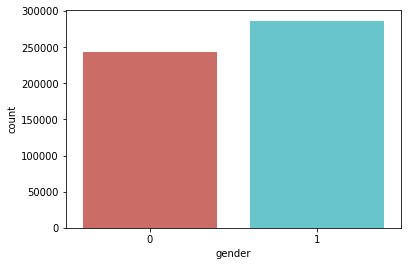

In [43]:
# Visualize the predictor variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=axs, palette='hls')
plt.show()

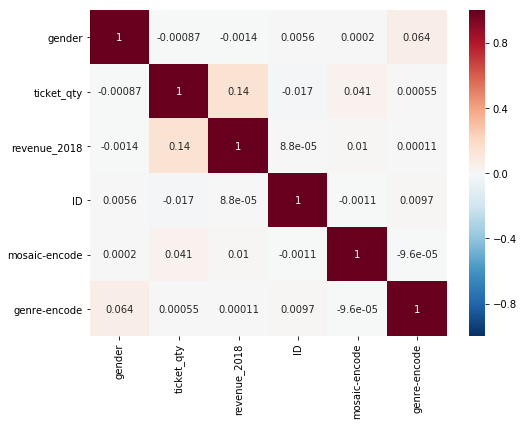

In [44]:
#Create coorelation heatmap and check for multicolinarity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
sns.heatmap(axs.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

## Linear Regression
* One-hot encode the data prior to fitting the model
* Train-Test Split
* Fit the model
* Predict
* Evaluate

In [45]:
#Drop ID and genre from axs dataset
df_axs = axs.drop(["ID","genre"], axis=1)

In [46]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X = df_axs.drop(columns='gender', axis=1)
y = axs['gender']
type(X)

pandas.core.frame.DataFrame

In [47]:
#Perform a train-test-split with a test set of 0.20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
#Preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

424128 106032 424128 106032


In [49]:
# Transformer that applies the LabelEncoder in each of the features
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        #self.columns = columns #list of column to encode
        self.columns = ['location','age','headline','marital',
                        'household_income','state','education',
                        'venue_name']
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [50]:
#One-hot encode train set using scikit-learn
from sklearn.preprocessing import LabelEncoder

li = MultiColumnLabelEncoder()
X_train_li = li.fit_transform(X_train)
X_train_li.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
358732,412,4,20,3,4,4,2,65,8,6136,0.063800,0.178642
535109,8,5,1037,2,1,4,4,99,2,242,0.017080,0.064439
932812,309,3,482,0,2,23,1,81,8,3168,0.187120,0.025634
849894,721,0,490,3,1,4,2,26,2,140,0.047648,0.178642
337674,309,2,1776,1,4,47,2,97,4,532,0.017080,0.051867


In [51]:
df_X_train_li = X_train_li
df_X_train_li.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
358732,412,4,20,3,4,4,2,65,8,6136,0.063800,0.178642
535109,8,5,1037,2,1,4,4,99,2,242,0.017080,0.064439
932812,309,3,482,0,2,23,1,81,8,3168,0.187120,0.025634
849894,721,0,490,3,1,4,2,26,2,140,0.047648,0.178642
337674,309,2,1776,1,4,47,2,97,4,532,0.017080,0.051867


In [52]:
#One-hot encode test set using scikit-learn
li2 = MultiColumnLabelEncoder()
X_test_li = li2.fit_transform(X_test)
X_test_li.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
930411,493,5,27,3,4,4,4,89,2,38,0.06380,0.079493
400562,246,1,888,0,3,33,1,64,3,3873,0.18712,0.064439
619343,365,2,434,0,4,5,0,25,2,418,0.18712,0.122723
863818,491,1,1692,0,1,9,4,58,3,663,0.18712,0.081294
804304,48,2,34,3,1,20,0,53,2,250,0.18712,0.178642


In [53]:
df_X_test_li = X_test_li
df_X_test_li.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
930411,493,5,27,3,4,4,4,89,2,38,0.06380,0.079493
400562,246,1,888,0,3,33,1,64,3,3873,0.18712,0.064439
619343,365,2,434,0,4,5,0,25,2,418,0.18712,0.122723
863818,491,1,1692,0,1,9,4,58,3,663,0.18712,0.081294
804304,48,2,34,3,1,20,0,53,2,250,0.18712,0.178642


In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train_li, y_train)
y_hat_test = linreg.predict(X_test_li)

In [55]:
#Calculate the residuals and the mean squared error
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.24643062185555167

In [56]:
#k-folds function that splits a dataset into k evenly sized pieces
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [57]:
axs_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [58]:
axs_folds = kfolds(axs_data, 5)

### K-fold Cross-Validation
Perform a linear regression for each fold, and calculate the training and test error.

In [59]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(axs_folds) if i!=n])
    test = axs_folds[n]
    # Fit a linear regression model
    linreg.fit(X_train_li, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(df_X_train_li)
    y_hat_test = linreg.predict(df_X_test_li)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[0.2463328132936391, 0.2463328132936391, 0.2463328132936391, 0.2463328132936391, 0.2463328132936391]
[0.24643062185555484, 0.24643062185555484, 0.24643062185555484, 0.24643062185555484, 0.24643062185555484]


### Cross-Validation using Scikit-Learn

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X_train_li, y_train, cv=5, scoring="neg_mean_squared_error")

#Calculate the mean of the MSE over the 5 cross-validations and compare and contrast with the result from the train-test-split case
cv_5_results

array([-0.24653959, -0.24627998, -0.24627743, -0.24625676, -0.24637719])

In [61]:
cv_5_results2 = cross_val_score(linreg, X_test_li, y_test, cv=5, scoring="neg_mean_squared_error")
cv_5_results2

array([-0.24607539, -0.24703203, -0.24656011, -0.24657999, -0.24617607])

## Logistic Regression
* One-hot encode the data prior to fitting the model
* Train-Test Split
* Fit the model
* Predict
* Evaluate

In [62]:
# Splitting the data into train and test sets (automatically uses stratified sampling by labels)
from sklearn.model_selection import train_test_split

X = df_axs.drop(columns='gender', axis=1)
y = axs['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [63]:
#One-hot encode train set using scikit-learn
from sklearn.preprocessing import LabelEncoder

le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
X_train_le.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
493130,51,2,1568,3,4,9,4,64,2,110,0.017080,0.178642
407443,276,2,232,1,4,34,1,71,2,278,0.042259,0.039775
526475,51,2,1174,3,0,37,0,59,5,2420,0.092658,0.178642
860091,300,3,945,2,4,4,0,71,2,204,0.116225,0.079076
828452,704,1,147,2,0,4,4,65,2,270,0.062942,0.064439


In [64]:
df_X_train_le = X_train_le
df_X_train_le.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
493130,51,2,1568,3,4,9,4,64,2,110,0.017080,0.178642
407443,276,2,232,1,4,34,1,71,2,278,0.042259,0.039775
526475,51,2,1174,3,0,37,0,59,5,2420,0.092658,0.178642
860091,300,3,945,2,4,4,0,71,2,204,0.116225,0.079076
828452,704,1,147,2,0,4,4,65,2,270,0.062942,0.064439


In [65]:
# Confirm shape of X_train_le dataset
X_train_le.shape

(265080, 12)

In [66]:
#One-hot encode test set using scikit-learn
le2 = MultiColumnLabelEncoder()
X_test_le = le2.fit_transform(X_test)
X_test_le.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
11275,35,4,291,0,4,33,1,78,8,792,0.187120,0.122723
623317,403,5,1757,1,2,5,1,44,4,300,0.127063,0.079076
172155,51,1,1498,0,1,4,4,85,2,482,0.127063,0.091984
110728,303,1,562,2,0,34,4,80,2,158,0.062942,0.064439
915188,51,2,1906,1,4,4,2,21,2,104,0.017080,0.064439


In [67]:
df_X_test_le = X_test_le
df_X_test_le.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
11275,35,4,291,0,4,33,1,78,8,792,0.187120,0.122723
623317,403,5,1757,1,2,5,1,44,4,300,0.127063,0.079076
172155,51,1,1498,0,1,4,4,85,2,482,0.127063,0.091984
110728,303,1,562,2,0,34,4,80,2,158,0.062942,0.064439
915188,51,2,1906,1,4,4,2,21,2,104,0.017080,0.064439


In [68]:
# Confirm shape of X_test_le dataset
X_test_le.shape

(265080, 12)

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg.fit(X_train_le, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
print(y_train.value_counts())
print(y_test.value_counts())

1    143360
0    121720
Name: gender, dtype: int64
1    143380
0    121700
Name: gender, dtype: int64


In [71]:
#Predict against test set using Sigmoid function
y_hat_test = logreg.predict(X_test_le)
y_hat_train = logreg.predict(X_train_le)

In [72]:
#Calculate the time it takes to make the prediction
import time
start = time.time()

y_hat_test = logreg.predict(X_test_le)
y_hat_train = logreg.predict(X_train_le)

end = time.time()
print("Execution time:", end - start)

Execution time: 0.028795957565307617


In [73]:
y_hat_test = logreg.predict_proba(X_test_le)
y_hat_test[0]

array([0.44686267, 0.55313733])

In [74]:
#Calculate the time it takes to predict probability
import time
start = time.time()

logreg.predict_proba(X_train_le)

end = time.time()
print("Execution time:", end - start)

Execution time: 0.0221099853515625


In [75]:
# How may times was the classifier correct for the training set?
logreg.score(X_train_le, y_train)

0.540829183642674

In [76]:
# How may times was the classifier correct for the test set?
logreg.score(X_test_le, y_test)

0.5409008601177003

## Classification Model Performance
Check the precision, recall, and accuracy of the model.

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

preds = [y_hat_train]

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model Classification Report:".format(ind + 1))
    print(classification_report(y_train, i))

----------------------------------------
Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.00      0.00    121720
           1       0.54      1.00      0.70    143360

    accuracy                           0.54    265080
   macro avg       0.67      0.50      0.35    265080
weighted avg       0.66      0.54      0.38    265080



In [78]:
logreg.coef_[0]

array([ 1.12445441e-04,  4.58435286e-02,  3.30710230e-06,  1.98208059e-03,
        1.86752251e-03,  4.45857993e-05, -4.37608018e-04,  1.82140365e-04,
        4.94251645e-05, -1.30371016e-07,  2.69137643e-04,  2.04656793e-03])

In [79]:
for feature, weight in zip(X.columns, logreg.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

location has a weight of : 0.00011244544055374192
age has a weight of : 0.04584352856920062
headline has a weight of : 3.3071023030604655e-06
marital has a weight of : 0.0019820805942862498
household_income has a weight of : 0.0018675225117079685
state has a weight of : 4.4585799323947906e-05
education has a weight of : -0.0004376080177490018
venue_name has a weight of : 0.00018214036510669692
ticket_qty has a weight of : 4.9425164501317924e-05
revenue_2018 has a weight of : -1.3037101621219512e-07
mosaic-encode has a weight of : 0.0002691376430402904
genre-encode has a weight of : 0.0020465679277929597


## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[     4 121716]
 [     1 143359]]


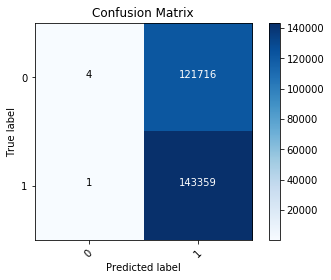

In [81]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [82]:
# Calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.
from sklearn.metrics import roc_curve, auc

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(df_X_test_le)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(df_X_train_le)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

## ROC Graph
Plot the Receiver Operating Characteristic Curve for both the train and test sets using the false positive rate and true positive rate.

Test AUC: 0.5357078735787576
Train AUC: 0.5364465983042354


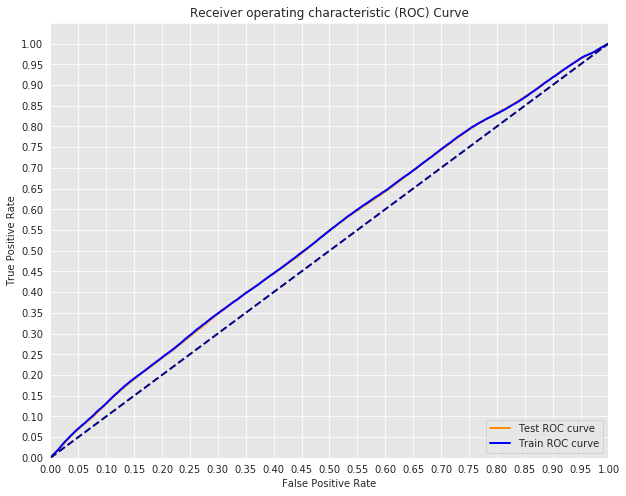

In [83]:
import seaborn as sns

#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Test Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
print('Test AUC: {}'.format(auc(fpr, tpr)))
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

### Random Forest

In [84]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(0)

forest = RandomForestClassifier(n_estimators = 80, random_state = 42) 
forest.fit(df_X_train_le, y_train)
mean_forest_score = np.mean(cross_val_score(forest, df_X_train_le, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_forest_score * 80))

Mean Cross Validation Score for Random Forest Classifier: 45.69%


In [85]:
pred = forest.predict(df_X_train_le)

In [86]:
# Check the training accuracy of the model
forest.score(df_X_train_le, y_train)

0.9995623962577335

In [87]:
# Check the testing accuracy of the model
forest.score(df_X_test_le, y_test)

0.5716689301342991

In [88]:
# Look at the importance and score of the included features
print(forest.feature_importances_)

[0.09386759 0.03891029 0.16113288 0.04895702 0.0536074  0.07710766
 0.05275552 0.10461911 0.03933136 0.16404541 0.09001103 0.07565472]


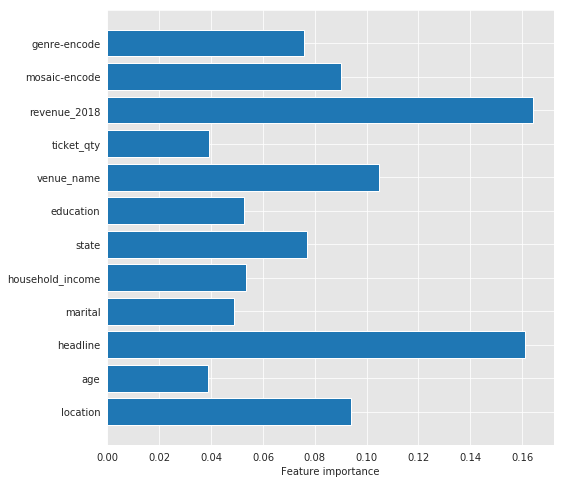

In [89]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), forest.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")

plot_feature_importances(forest)

**Observations**: `revenue_2018`, and `headline` are the most important features.

## Model Performance

In [90]:
pred = forest.predict(df_X_train_le)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[121667     53]
 [    63 143297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    121720
           1       1.00      1.00      1.00    143360

    accuracy                           1.00    265080
   macro avg       1.00      1.00      1.00    265080
weighted avg       1.00      1.00      1.00    265080



**Observations**: 100% accuracy and precision for Random Forest Classifier which means that the data may be overfitting.

## Adaboost and Gradient Boosting Classifiers
* Compare and contrast Adaboost and Gradient Boosting

In [91]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [92]:
target = df_axs.gender
df_axs.drop('gender', axis=1, inplace=True)

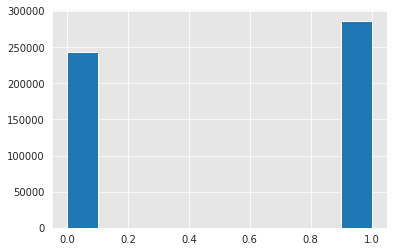

In [93]:
target.hist()

In [94]:
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867


In [98]:
#Label encode df_axs using scikit-learn
df_axs["location_e"] = LabelEncoder().fit_transform(df_axs.location)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553


In [99]:
#Label encode df_axs using scikit-learn
df_axs["age_e"] = LabelEncoder().fit_transform(df_axs.age)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3


In [100]:
#Label encode df_axs using scikit-learn
df_axs["headline_e"] = LabelEncoder().fit_transform(df_axs.headline)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916


In [101]:
#Label encode df_axs using scikit-learn
df_axs["marital_e"] = LabelEncoder().fit_transform(df_axs.marital)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154,3
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130,3
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435,3
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752,0
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916,0


In [102]:
#Label encode df_axs using scikit-learn
df_axs["household_income_e"] = LabelEncoder().fit_transform(df_axs.household_income)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e,household_income_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154,3,0
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130,3,0
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435,3,0
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752,0,4
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916,0,4


In [103]:
#Label encode df_axs using scikit-learn
df_axs["state_e"] = LabelEncoder().fit_transform(df_axs.state)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e,household_income_e,state_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154,3,0,5
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130,3,0,5
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435,3,0,5
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752,0,4,4
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916,0,4,4


In [104]:
#Label encode df_axs using scikit-learn
df_axs["education_e"] = LabelEncoder().fit_transform(df_axs.education)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e,household_income_e,state_e,education_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154,3,0,5,0
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130,3,0,5,0
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435,3,0,5,0
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752,0,4,4,0
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916,0,4,4,0


In [105]:
#Label encode df_axs using scikit-learn
df_axs["venue_name_e"] = LabelEncoder().fit_transform(df_axs.venue_name)
df_axs.head()

,location,age,headline,marital,household_income,state,education,venue_name,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e,household_income_e,state_e,education_e,venue_name_e
5993,Dallas-Fort Worth-Arlington TX,35 to 44,Nathaniel Rateliff & The Night Sweats,Unknown,$1-49K,CO,Bachelor Degree,Red Rocks Amphitheatre,2,268,0.047648,0.051867,36,2,1154,3,0,5,0,59
5994,Dallas-Fort Worth-Arlington TX,35 to 44,Mumford & Sons,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,2,212,0.047648,0.022631,36,2,1130,3,0,5,0,25
5995,Dallas-Fort Worth-Arlington TX,35 to 44,Dave Matthews Band,Unknown,$1-49K,CO,Bachelor Degree,Fiddler's Green Amphitheatre,4,960,0.047648,0.081438,36,2,435,3,0,5,0,25
6002,Denver-Aurora-Lakewood CO,55 to 64,Travis Scott,Extremely Likely Married,$50-99K,CA,Bachelor Degree,Sprint Center,16,19216,0.116225,0.091984,52,4,1752,0,4,4,0,77
6003,San Diego-Carlsbad CA,45 to 54,Khalid,Extremely Likely Married,$50-99K,CA,Bachelor Degree,STAPLES Center,4,1208,0.116225,0.051867,553,3,916,0,4,4,0,65


In [108]:
#Drop datetime, genre and mosaic from axs dataset
df_axs = df_axs.drop(["location","age","headline","marital",
                      "household_income","state","education",
                      "venue_name"], axis=1)
df_axs.head()

KeyError: "['location' 'age' 'headline' 'marital' 'household_income' 'state'\n 'venue_name'] not found in axis"

In [112]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_axs), columns=df_axs.columns)
scaled_df.head()

,ticket_qty,revenue_2018,mosaic-encode,genre-encode,location_e,age_e,headline_e,marital_e,household_income_e,state_e,education_e,venue_name_e
0,-0.308836,-0.031399,-0.873422,-0.814382,-1.303648,-0.255593,0.381395,1.361186,-1.302711,-0.792486,-1.188738,0.065835
1,-0.308836,-0.033991,-0.873422,-1.406232,-1.303648,-0.255593,0.337600,1.361186,-1.302711,-0.792486,-1.188738,-1.232193
2,0.282726,0.000625,-0.873422,-0.215774,-1.303648,-0.255593,-0.930626,1.361186,-1.302711,-0.792486,-1.188738,-1.232193
3,3.832093,0.845480,0.378314,-0.002288,-1.227170,1.193077,1.472617,-1.150213,1.195696,-0.854531,-1.188738,0.753026
4,0.282726,0.012102,0.378314,-0.814382,1.167542,0.468742,-0.052904,-1.150213,1.195696,-0.854531,-1.188738,0.294898


In [113]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.25)

* Create an AdaBoostClassifier
* Create a GradientBoostingClassifer

In [114]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

### Train each of the classifiers using the training data

In [115]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [116]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [117]:
#Create some predictions using each model so that we can calculate the training and testing accuracy for each.
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

### The following function will calculate the training and testing accuracy and f1-score for each model

In [118]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.5814948946230069
F1-Score: 0.6667654586015067

Model: Gradient Boosted Trees
Accuracy: 0.5851038680146874
F1-Score: 0.6654376945618998

Testing Metrics
Model: AdaBoost
Accuracy: 0.5811151350535687
F1-Score: 0.6661535408686658

Model: Gradient Boosted Trees
Accuracy: 0.584872491323374
F1-Score: 0.6649004525162461


In [119]:
#Create a confusion matrix and classification report for each
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[21630, 39257],
       [16262, 55391]])

In [120]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[22933, 37954],
       [17067, 54586]])

In [121]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44     60887
           1       0.59      0.77      0.67     71653

    accuracy                           0.58    132540
   macro avg       0.58      0.56      0.55    132540
weighted avg       0.58      0.58      0.56    132540



In [122]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.57      0.38      0.45     60887
           1       0.59      0.76      0.66     71653

    accuracy                           0.58    132540
   macro avg       0.58      0.57      0.56    132540
weighted avg       0.58      0.58      0.57    132540



In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, scaled_df, target, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):


In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_df, target, cv=5).mean())

## SUMMARY:
* Linear Regression K-fold Cross-Validation: 24%
* Logistic Regresssion: 54%
* ROC Curve: 53%
* Random Forest: 100%
* AdaBoost: 58%
* Gradient Boosted Trees: 58%

## Determine the Best Recommendation Model

In [ ]:
le = MultiColumnLabelEncoder()
axs1 = le.fit_transform(axs)
axs1.head()

In [ ]:
axs1 = axs1.drop(["gender","genre","location","age","marital",
                  "household_income","state","education",
                  "venue_name","revenue_2018","mosaic-encode",
                  "genre-encode"], axis=1)
axs1.head()

In [ ]:
axs1.rename(columns={"headline":"headline_encoded"}, inplace = True)
print(axs1.shape)
axs1.head()

In [ ]:
#Train-Test Split the axs1 dataset
X2 = axs1
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)

X2_train.shape, X2_test.shape

In [ ]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(X2_test,reader)

#Look at how many users and items we have in our dataset.
dataset = data.build_full_trainset()
print('Number of users: ',dataset.n_users,'\n')
print('Number of items: ',dataset.n_items)

In [ ]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

## Perform a gridsearch with SVD
params = {'n_factors' :[20,50],
         'reg_all':[0.02,0.05]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [ ]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

In [ ]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson','user_based':False})
cv_knn_basic= cross_validate(knn_basic,data,n_jobs=-1)

In [ ]:
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

In [ ]:
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson','user_based':False})
cv_knn_baseline = cross_validate(knn_baseline,data)

In [ ]:
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

### SUMMARY:
* Based on these outputs, the best model is SVD model with 20 factors.

## Making Recommendations

In [ ]:
svd = SVD(n_factors=20, reg_all=0.02)
svd.fit(dataset)

In [ ]:
svd.predict(18485,1154)

In [ ]:
axs.head()

In [ ]:
axs['headline_encoded'] = LabelEncoder().fit_transform(axs.headline)
axs.head()

In [ ]:
#Drop ID and ticket_qty
axs_final = axs.drop(['gender','location','age','marital','household_income',
                      'state','education','venue_name','ticket_qty','revenue_2018',
                      'ID','mosaic-encode','genre-encode'], axis=1)
axs_final.head()

## Obtaining User Ratings

In [ ]:
def artist_rater(axs_final,num, genre=None):
    userID = 18485
    rating_list = []
    while num > 0:
        if genre:
            artist = axs_final[axs_final['genre'].str.contains(genre)].sample(1)
        else:
            artist = axs_final.sample(1)
        print(artist)
        rating = input('How many tickets would you purchase to see this artist artist on a scale of 1-10, press n to quit:\n')
        if rating == 'n':
            break
        else:
            rating_one_artist = {'ID':userID,'headline_encoded':artist['headline_encoded'].values[0],'ticket_qty':rating}
            rating_list.append(rating_one_artist) 
            num -= 1
    return rating_list

In [ ]:
user_rating = artist_rater(axs_final,18485,'Rock')

In [ ]:
user_rating

## Making Predictions with the New Ratings

In [ ]:
## add the new ratings to the original ratings DataFrame
new_ratings_df = axs1.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [ ]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 20, reg_all=0.02)
svd_.fit(new_data.build_full_trainset())

In [ ]:
# make predictions for the user
# you'll probably want to create a list of tuples in the format (headline_encoded, predicted_score)
list_of_artists = []
for h_id in axs1['headline_encoded'].unique():
    list_of_artists.append( (h_id,svd_.predict(18485,h_id)[3]))

In [ ]:
# order the predictions from highest to lowest rated
ranked_artists = sorted(list_of_artists,reverse=True)

In [ ]:
# return the top n recommendations using the 
def recommended_artists(user_ratings,artist_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = artist_title_df.loc[artist_title_df['headline_encoded'] == int(rec[0])]['headline']
            print('Recommendation # ',idx+1,': ',title)
            n-= 1
            if n == 0:
                break
            
recommended_artists(ranked_artists,axs_final,5)

## Next Steps:
* Try and chain all of the steps together into one function that asks users for ratings for a certain number of artists, then all of the above steps are performed to return the top n recommendations
* Make a recommender system that only returns items that come from a specified genre
* Create a user interface to allow users to easily choose items and get recommendations.